In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from scipy.stats import ttest_ind
from scipy import stats


In [2]:
#import warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [3]:
#read data insurance
data_insurance = pd.read_csv('insurance.csv')
data_insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Analisa Descriptive Statistic

1. Berapa rata rata umur pada data tersebut?
2. Berapa rata rata nilai BMI dari yang merokok?
3. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
4. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25 (overweight)
5. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

### Berapa rata rata umur pada data tersebut

In [4]:
#menampilkan rata-rata umur keseluruhan
rerata_umur = data_insurance['age'].mean()
print(f'rata-rata umur secara keseluruhan yaitu: {rerata_umur}')

rata-rata umur secara keseluruhan yaitu: 39.20702541106129


### Berapa rata-rata nilai BMI dari yang merokok

In [5]:
#menghitung rata rata nilai BMI perokok
rerata_BMI_perokok = data_insurance[data_insurance['smoker'] == 'yes']['bmi'].mean()
print(f'rata-rata nilai BMI perokok yaitu: {rerata_BMI_perokok}')

rata-rata nilai BMI perokok yaitu: 30.70844890510949


### Mana yang lebih tinggi? rata rata tagihan kesehatan perokok atau non merokok?

<Axes: xlabel='smoker', ylabel='charges'>

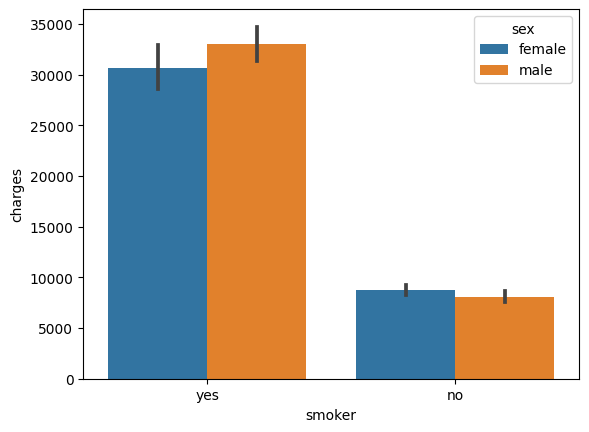

In [6]:
sns.barplot(data=data_insurance, x= 'smoker', y='charges', hue='sex')

Terlihat dari grafik, ternyata tagihan perokok jauh lebih tinggi dibandingkan dengan non perokok. Selain itu, perokok laki laki memiliki tagihan yang lebih besar dari perokok perempuan

### Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)

In [7]:
rerata_tagihan_by_bmi_upto25 = data_insurance[data_insurance['bmi'] > 25].groupby('smoker')['charges'].mean().reset_index()
rerata_tagihan_by_bmi_upto25

,smoker,charges
0,no,8629.589610
1,yes,35116.909657


Dari tabel, rata rata tagihan perokok yang BMI nya di atas 25 memiliki tagihan lebih tinggi dari pada non perokok yang BMI nya di atas 25

### BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [8]:
#membuat tabel rata-rata BMI berdasarkan smoker
tabel_rerata_bmi = data_insurance.groupby('smoker')['bmi'].mean().reset_index()
tabel_rerata_bmi

,smoker,bmi
0,no,30.651795
1,yes,30.708449


Terlihat, BMI perokok lebih tinggi dari pada non perokok, namun memiliki selisih yang kecil

## Analisa Variabel Diskrit

1. Gender mana yang memiliki tagihan paling tinggi?
2. Apakah setiap region memiliki proporsi data banyak orang yang sama?
3. Mana yang lebih tinggi proporsi perokok atau non perokok?
4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?


### Gender mana yang memiliki tagihan paling tinggi?

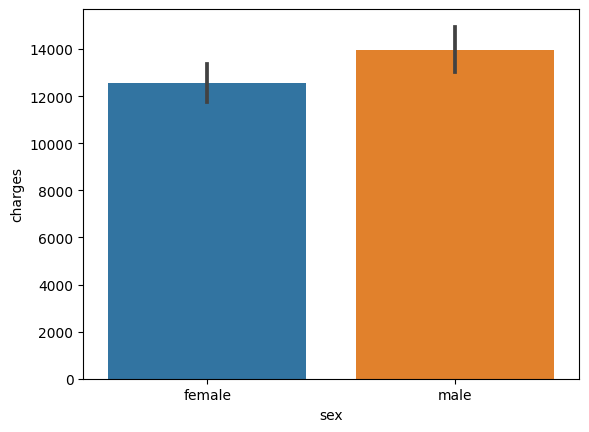

In [9]:
sns.barplot(data=data_insurance, x='sex', y='charges')

plt.show()

Dari visualisasi, terlihat bahwa gender perempuan memiliki tagihan paling tinggi

Distribusi peluang tagihan di tiap-tiap region

<Axes: xlabel='charges', ylabel='Density'>

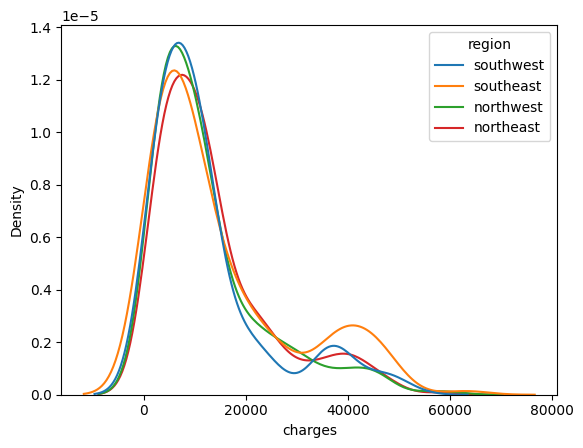

In [10]:
# Menggunakan KDE plot
sns.kdeplot(data=data_insurance, x='charges', hue='region')

### Apakah setiap region memiliki proporsi data banyak orang yang sama?

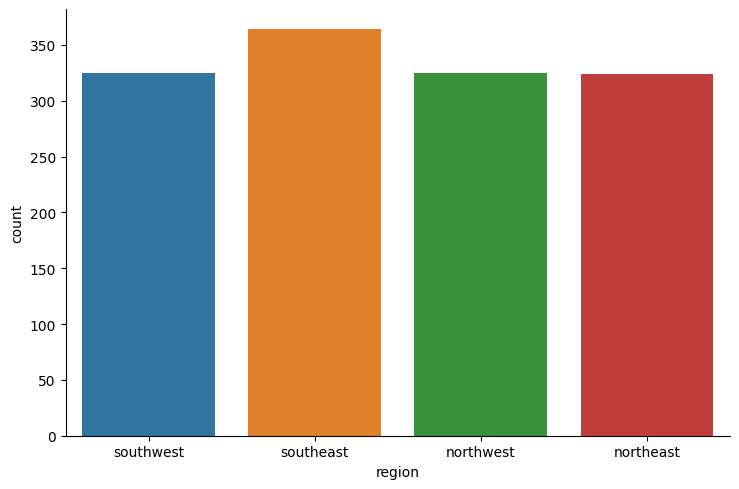

In [11]:
sns.catplot(data=data_insurance, x='region', kind='count', aspect=1.5)

plt.show()

Dapat dilihat dari visualisasi, setiap region tidak memiliki proporsi banyak orang yang sama. southeast memiliki jumlah orang terbanyak

### Mana yang lebih tinggi proporsi perokok atau non perokok?

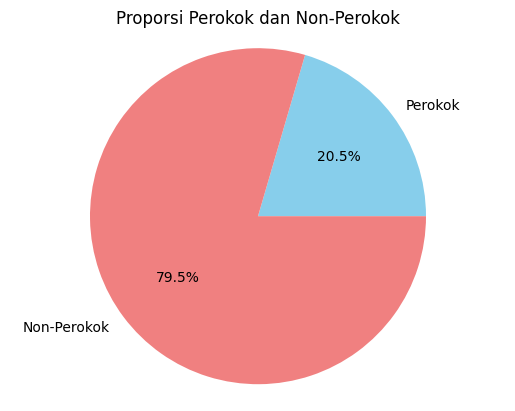

In [12]:

# Menghitung jumlah perokok dan non-perokok
jumlah_perokok = len(data_insurance[data_insurance['smoker'] == 'yes'])
jumlah_non_perokok = len(data_insurance[data_insurance['smoker'] == 'no'])

# Membuat pie chart
labels = ['Perokok', 'Non-Perokok']
sizes = [jumlah_perokok, jumlah_non_perokok]
colors = ['skyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Mengatur proporsi lingkaran menjadi bulat
plt.title('Proporsi Perokok dan Non-Perokok')

plt.show()

Dari visualisasi, ternyata perokok lebih rendah dari pada non-perokok

### Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [13]:
peluang_perokok = len(data_insurance[data_insurance['smoker'] == 'yes'])/len(data_insurance)
peluang_perempuan_perokok = len(data_insurance[(data_insurance['sex'] == 'female') & (data_insurance['smoker'] == 'yes')])/len(data_insurance)

peluang_perempuan_given_perokok = peluang_perempuan_perokok/peluang_perokok

print(f'perluang seseorang tersebut adalah perempuan diketahui dia adalah perokok yaitu {peluang_perempuan_given_perokok}')

perluang seseorang tersebut adalah perempuan diketahui dia adalah perokok yaitu 0.4197080291970803


### Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [14]:
peluang_lakilaki_perokok = len(data_insurance[(data_insurance['sex'] == 'male') & (data_insurance['smoker'] == 'yes')])/len(data_insurance)

peluang_lakilaki_given_perokok = peluang_lakilaki_perokok/peluang_perokok

print(f'perluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok yaitu {peluang_lakilaki_given_perokok}')


perluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok yaitu 0.5802919708029197


## Analisa Variabel Kontinu

1. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
16.7k

2. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

### Mana yang lebih mungkin terjadi ?
### a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
### b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [15]:
#mengitung n(charges > 16700 ∩ bmi > 25)
jumlah_bmiupto25_chargesupto16700 = len(data_insurance[(data_insurance['charges'] > 16700) & (data_insurance['bmi'] > 25)])

#mengitung n(charges > 16700 ∩ bmi < 25)
jumlah_bmidownupto25_chargesupto16700 = len(data_insurance[(data_insurance['charges'] > 16700) & (data_insurance['bmi'] < 25)])

#menghitung n(charge > 16700)
jumlah_chargesupto16700 = len(data_insurance[data_insurance['charges'] > 16700])

#menghitung p(bmi > 25|charges > 16700)
peluang_bmiupto25_given_chargesupto16700 = jumlah_bmiupto25_chargesupto16700/jumlah_chargesupto16700

#menghitung p(bmi < 25|charges > 16700)
peluang_bmidownto25_given_chargesupto16700 = jumlah_bmidownupto25_chargesupto16700/jumlah_chargesupto16700

print(f'peluang seseorang dengan BMI di atas 25 mendapat tagihan kesehatan di atas 16700 yaitu {peluang_bmiupto25_given_chargesupto16700}')
print(f'peluang seseorang dengan BMI di bawah 25 mendapat tagihan kesehatan di atas 16700 yaitu {peluang_bmidownto25_given_chargesupto16700}')


peluang seseorang dengan BMI di atas 25 mendapat tagihan kesehatan di atas 16700 yaitu 0.8473053892215568
peluang seseorang dengan BMI di bawah 25 mendapat tagihan kesehatan di atas 16700 yaitu 0.15269461077844312


Dari output di atas terlihat bahwa yang lebih mungkin terjadi yaitu seseorang dengan BMI di atas 25 mendapat tagihan kesehatan di atas 16700

### Mana yang lebih mungkin terjadi 
### a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
### b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [16]:
#menghitung n(perokok ∩ bmi > 25 ∩ charges > 16700)
jumlah_perokok_bmiupto25_chargesupto16700 = len(data_insurance[(data_insurance['smoker'] == 'yes') & (data_insurance['bmi'] > 25) & (data_insurance['charges'] > 16700)])

#menghitung n(non perokok ∩ bmi > 25 ∩ charges > 16700)
jumlah_non_perokok_bmiupto25_chargesupto16700 = len(data_insurance[(data_insurance['smoker'] == 'no') & (data_insurance['bmi'] > 25) & (data_insurance['charges'] > 16700)])

#menghitung n(bmi > 25 ∩ charges > 16700)
jumlah_bmiupto25_chargesupto16700 = len(data_insurance[(data_insurance['charges'] > 16700) & (data_insurance['bmi'] > 25)])

#menghitung p(perokok|bmi > 25 ∩ charges > 16700)
peluang_perokok_given_bmiupto25_chargesupto16700 = jumlah_perokok_bmiupto25_chargesupto16700/jumlah_bmiupto25_chargesupto16700

#menghitung p(non perokok|bmi > 25 ∩ charges > 16700)
peluang_non_perokok_given_bmiupto25_chargesupto16700 = jumlah_non_perokok_bmiupto25_chargesupto16700/jumlah_bmiupto25_chargesupto16700

print(f'peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16700 {peluang_perokok_given_bmiupto25_chargesupto16700}')
print(f'peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16700 {peluang_non_perokok_given_bmiupto25_chargesupto16700}')

peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16700 0.7597173144876325
peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16700 0.24028268551236748


Dari output di atas, ternyata yang lebih mungkin terjadi yaitu seseorang dengan BMI di atas 25 mendapatkan tagihan di atas 16700

## Analisa Korelasi Variabel

1. korelasi antara charges dan BMI
2. korelasi antara charges dan age

### korelasi antara charges dan BMI

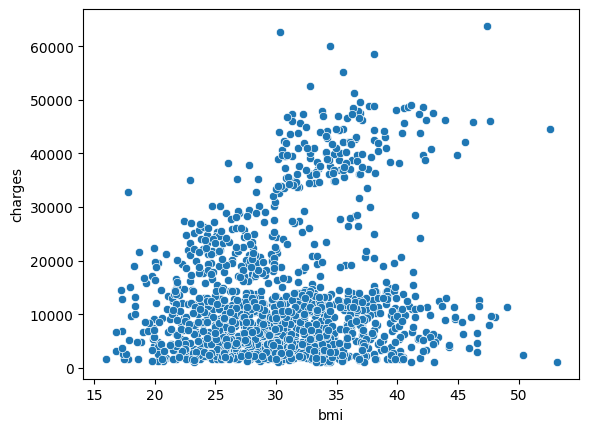

In [17]:
sns.scatterplot(data_insurance, x='bmi', y='charges')
plt.show()

In [18]:
covarian_bmi_charges = np.cov(data_insurance['bmi'], data_insurance['charges'])
covarian_bmi_charges

array([[3.71878836e+01, 1.46473044e+04],
       [1.46473044e+04, 1.46652372e+08]])

In [19]:
korelasi_bmi_charges = data_insurance[['bmi','charges']].corr()
korelasi_bmi_charges

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


data charges dengan BMI memiliki korelasi positif dengan nilai korelasi yaitu 0.198 yang dapat di artikan bahwa data charges dengan BMI kekuatan korelasinya lemah

### korelasi antara Charges dan age

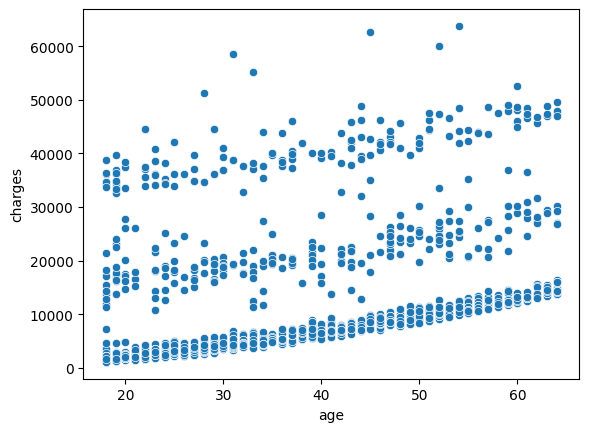

In [20]:
sns.scatterplot(data= data_insurance, x='age', y='charges')

plt.show()

In [21]:
covarian_age_charges = np.cov(data_insurance['age'], data_insurance['charges'])
covarian_age_charges

array([[1.97401387e+02, 5.08748023e+04],
       [5.08748023e+04, 1.46652372e+08]])

In [22]:
korelasi_age_charges = data_insurance[['age','charges']].corr()
korelasi_age_charges

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


data charges dengan age memiliki korelasi positif dengan nilai korelasi yaitu 0.299 yang dapat di artikan bahwa data charges dengan age kekuatan korelasinya lemah

## Pengujian Hipotesis

1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
dengan BMI dibawah 25
3. Tagihan kesehatan laki-laki lebih besar dari perempuan

### Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

#### 1. Mnentukan Hipotesis dan Significance Level

Hipotesis:

H0 : 𝜇perokok = 𝜇non_perokok

H1 : 𝜇perokok ≠ 𝜇non_perokok

Significance Level:

alpha = 0.05

In [23]:
alpha = 0.05

#### 2. Aturan keputusan

Uji dua pihak (H1 mengandung tanda ≠)

#### 3. Hitung statistik uji

In [45]:
# Mengambil data tagihan kesehatan untuk perokok
charges_perokok = data_insurance[data_insurance['smoker'] == 'yes']['charges']

# Mengambil data tagihan kesehatan untuk non perokok
charges_non_perokok = data_insurance[data_insurance['smoker'] == 'no']['charges']

# Melakukan uji t-test
stat, p = ttest_ind(a = charges_perokok, b = charges_non_perokok, equal_var=False, alternative='two-sided') # eaual_var= False karena varians kedua populasi berbeda

# Menampilkan hasil uji statistik dan p-value
print('Statistics = %f, p-valuee = %f' % (stat, p)) 

Statistics = 32.751888, p-valuee = 0.000000


#### 4. Pengambilan keputusan

setelah dilakukan perhitungan, di dapatkan nilai statistic 32,752 dan p-value = 0,0000 (sangat kecil).

Dikarenakan p-value di bawah 0.05 (alpha), maka tolak H0. Sehingga memiliki arti dari uji statistik di dapatkan belum ada cukup bukti bahwa rata rata dari tagihan perokok dan non perokok adalah sama.

### Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

#### 1. menentukan Hipotesis dan Significance Level

Hipotesis:

H0 : 𝜇charge_BMIupto25 >= 𝜇charge_BMIdownto25

H1 : 𝜇charge_BMIupto25 < 𝜇charge_BMIdownto25

Significance Level:

alpha = 0.05

#### 2. Aturan keputusan

Uji pihak kiri (H1 mengandung tanda <)

#### 3. Hitung statistik uji

In [30]:
# Mengambil data tagihan kesehatan dengan BMI di atas 25
data_bmi_above_25 = data_insurance[data_insurance['bmi'] > 25]['charges']

# Mengambil data tagihan kesehatan dengan BMI di bawah 25
data_bmi_below_25 = data_insurance[data_insurance['bmi'] < 25]['charges']

# Melakukan uji t-test
t_statistic, p_value = stats.ttest_ind(data_bmi_above_25, data_bmi_below_25, equal_var=False, alternative='less')

# Menampilkan hasil uji statistik dan p-value
print("Uji Statistik: ", t_statistic)
print("P-value: ", p_value)

Uji Statistik:  4.305033989510502
P-value:  0.9999910417722027


#### 4. Pengambilan keputusan

setelah dilakukan perhitungan, di dapatkan nilai statistic 4.305 dan p-value = 0.999.

Dikarenakan p-value di atas 0.05 (alpha), maka gagal tolak H0. Sehingga memiliki arti dari uji statistik di dapatkan ada cukup bukti bahwa rata rata dari tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

### Tagihan kesehatan laki-laki lebih besar dari perempuan

#### 1. menentukan Hipotesis dan Significance Level

H0 : 𝜇charge_male >= 𝜇charge_female

H1 : 𝜇charge_male < 𝜇charge_female

Significance Level:

alpha = 0.05

#### 2. Aturan keputusan

Uji pihak kiri (H1 mengandung tanda <)

#### 3. Hitung statistik uji

In [40]:
# Mengambil data tagihan kesehatan untuk laki-laki dan perempuan
data_charge_male = data_insurance[data_insurance['sex'] == 'male']['charges']
data_charge_female = data_insurance[data_insurance['sex'] == 'female']['charges']

# Melakukan uji t-test
t_statistic, p_value = stats.ttest_ind(data_charge_male, data_charge_female, equal_var=False, alternative='less')

# Menampilkan hasil uji statistik dan p-value
print("Uji Statistik: ", t_statistic)
print("p-value: ", p_value)

Uji Statistik:  2.1008878232359565
p-value:  0.9820794925219917


#### 4. Pengambilan keputusan

setelah dilakukan perhitungan, di dapatkan nilai statistic 2.101 dan p-value = 0.982.

Dikarenakan p-value di atas 0.05 (alpha), maka gagal tolak H0. Sehingga memiliki arti dari uji statistik di dapatkan ada cukup bukti bahwa rata rata dari Tagihan kesehatan laki-laki lebih besar dari perempuan